# Volume Estimation

This notebook estimates volume for all model radii stored in a given folder as npz files.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

import json

from minima_volume.volume_funcs import ( analyze_and_plot_model_landscape )

## Input Parameters

The input parameters are the folder to analyze, the files in the folder, and the loss and accuracy thresholds to use. Note that to check our thresholds are reasonable, we also print the base loss + accuracy thresholds.

Directories to analyze: ['data_0']

Analyzing directory: data_0

--- Using thresholds: loss=0.1, acc=0.95 ---
Loaded data dictionary with 1 models from data_0
The size of the base dataset is  10000
The number of model parameters is  235146
The loss landscape is for data trained with 0
data_0: 0.04936296492815018

Top perturbations for data_0:
Top 5 r_vals: [np.float64(14.907312191130126), np.float64(14.013316000031718), np.float64(13.883575742518667), np.float64(13.226612687819346), np.float64(13.22601494905528)]
Top 5 seeds: [39, 20, 15, 37, 32]
Plot saved to: data_0/loss_0.1/log_volume.png


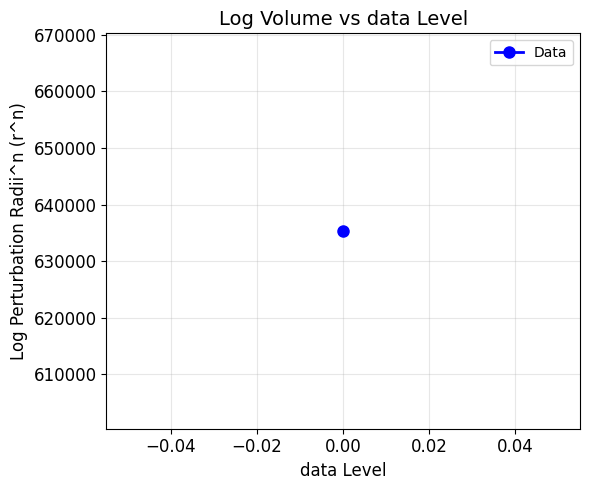

Test loss  [0.1754620224237442]
log_exp_r_n  [np.float64(635325.7416051031)]


Plot saved to: data_0/loss_0.1/gen_log_volume.png


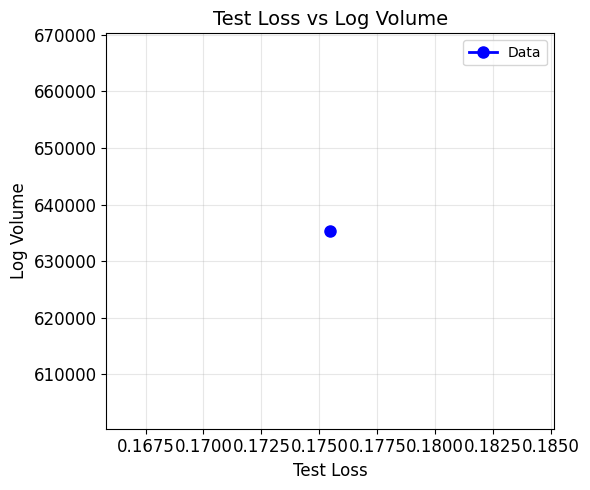

Plot saved to: data_0/loss_0.1/test_vs_data.png


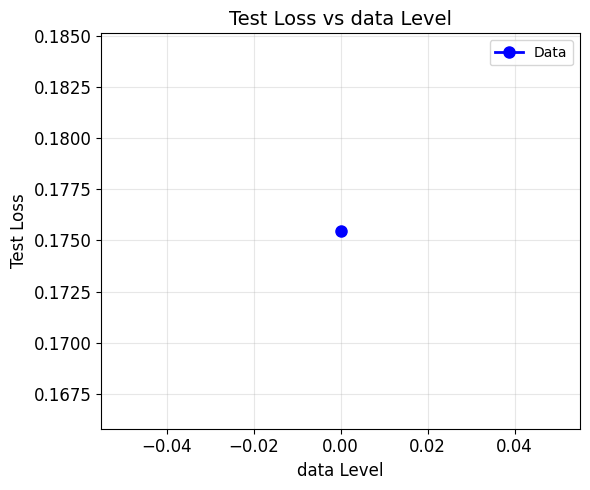

Plot saved to: data_0/loss_0.1/other_plots/avg_radius.png


Plot saved to: data_0/loss_0.1/other_plots/radius_hist.png


Plot saved to: data_0/acc_0.95/avg_radius.png


Plot saved to: data_0/acc_0.95/radius_hist.png


Plot saved to: data_0/acc_0.95/log_volume.png


/Users/brycesandlund/miniconda3/envs/minima-volume-project/lib/python3.10/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/Users/brycesandlund/miniconda3/envs/minima-volume-project/lib/python3.10/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Plot saved to: data_0/acc_0.95/gen_log_volume.png
Ranks for quick verification:
data_level ranks: [1]
test_loss ranks: [1]
log_exp_r_n ranks: [1]
log_exp_r_n_acc ranks: [1]

Loss:
Does it predict the minimas which are actually trained?  True
How many violations does it have, when ordering the log volumes?  0

Accuracy:
Does it predict the minimas which are actually trained?  True
How many violations does it have, when ordering the log volumes?  0
Results saved to data_0/loss_0.1/results.json
Successfully analyzed data_0 with loss=0.1, acc=0.95

--- Using thresholds: loss=0.2, acc=0.9 ---
Loaded data dictionary with 1 models from data_0
The size of the base dataset is  10000
The number of model parameters is  235146
The loss landscape is for data trained with 0
data_0: 0.04936296492815018

Top perturbations for data_0:
Top 5 r_vals: [np.float64(23.13322790436794), np.float64(21.587779987453704), np.float64(21.030741953164373), np.float64(20.817158018746415), np.float64(19.85133980091828

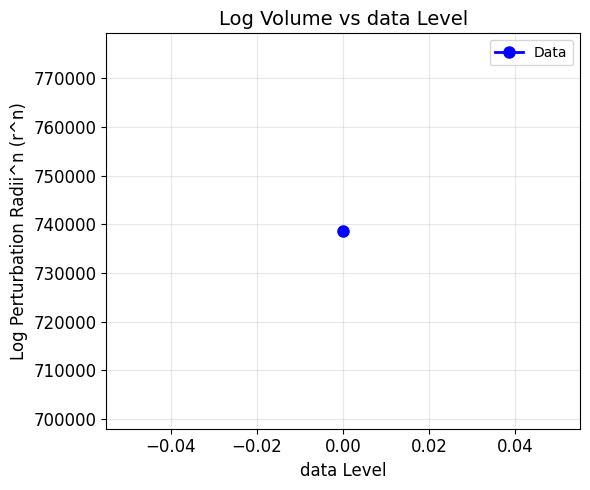

Test loss  [0.1754620224237442]
log_exp_r_n  [np.float64(738653.1684258721)]


Plot saved to: data_0/loss_0.2/gen_log_volume.png


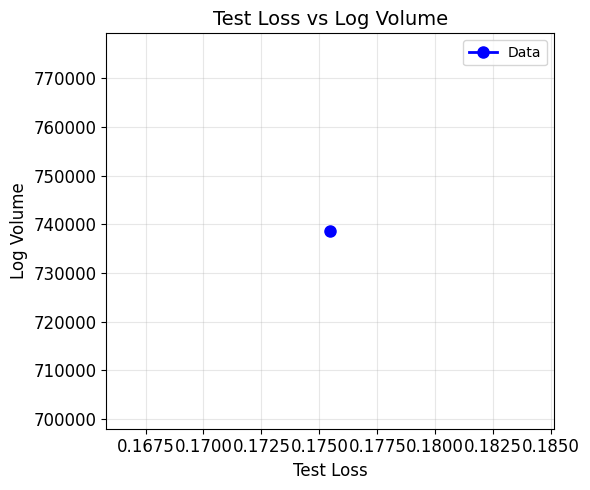

Plot saved to: data_0/loss_0.2/test_vs_data.png


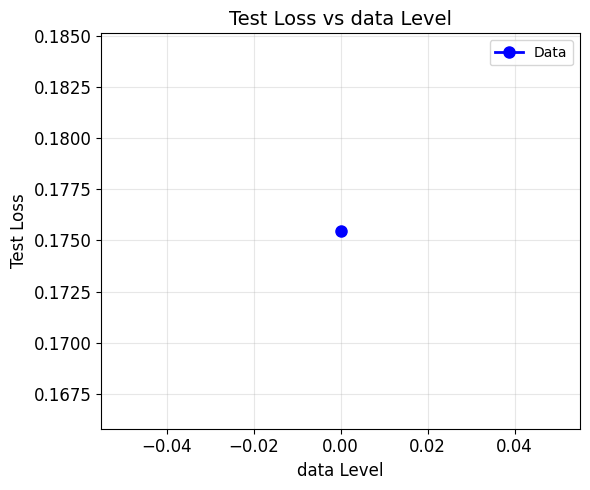

Plot saved to: data_0/loss_0.2/other_plots/avg_radius.png


Plot saved to: data_0/loss_0.2/other_plots/radius_hist.png


Plot saved to: data_0/acc_0.9/avg_radius.png


Plot saved to: data_0/acc_0.9/radius_hist.png


Plot saved to: data_0/acc_0.9/log_volume.png
Plot saved to: data_0/acc_0.9/gen_log_volume.png
Ranks for quick verification:
data_level ranks: [1]
test_loss ranks: [1]
log_exp_r_n ranks: [1]
log_exp_r_n_acc ranks: [1]

Loss:
Does it predict the minimas which are actually trained?  True
How many violations does it have, when ordering the log volumes?  0

Accuracy:
Does it predict the minimas which are actually trained?  True
How many violations does it have, when ordering the log volumes?  0
Results saved to data_0/loss_0.2/results.json
Successfully analyzed data_0 with loss=0.2, acc=0.9

--- Using thresholds: loss=0.05, acc=0.85 ---
Loaded data dictionary with 1 models from data_0
The size of the base dataset is  10000
The number of model parameters is  235146
The loss landscape is for data trained with 0
data_0: 0.04936296492815018

Top perturbations for data_0:
Top 5 r_vals: [np.float64(1.6352490738360983), np.float64(1.6342447856243145), np.float64(1.6311693779967718), np.float64(1.5

Plot saved to: data_0/loss_0.05/log_volume.png


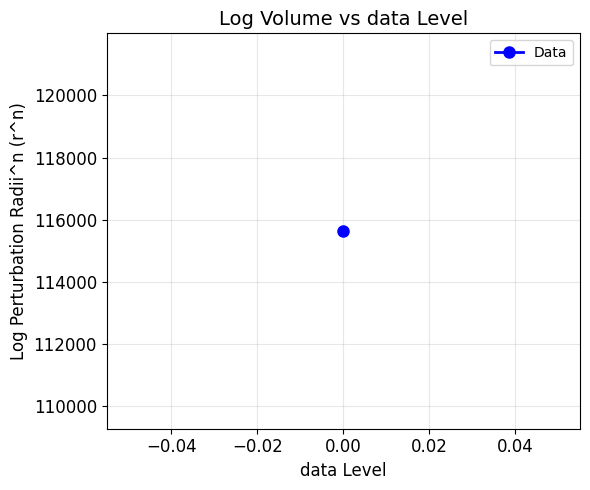

Test loss  [0.1754620224237442]
log_exp_r_n  [np.float64(115639.74596505452)]


Plot saved to: data_0/loss_0.05/gen_log_volume.png


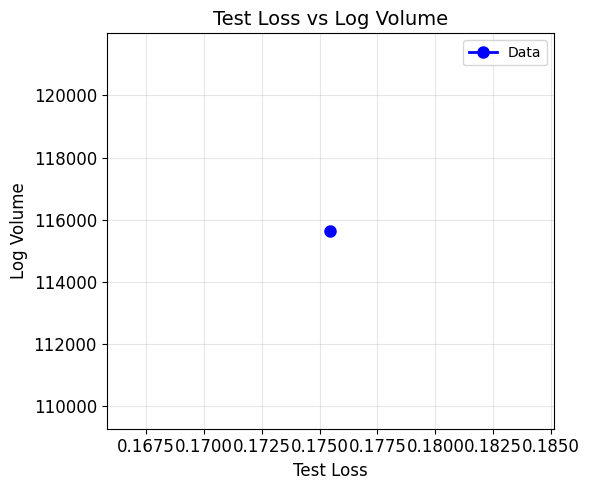

Plot saved to: data_0/loss_0.05/test_vs_data.png


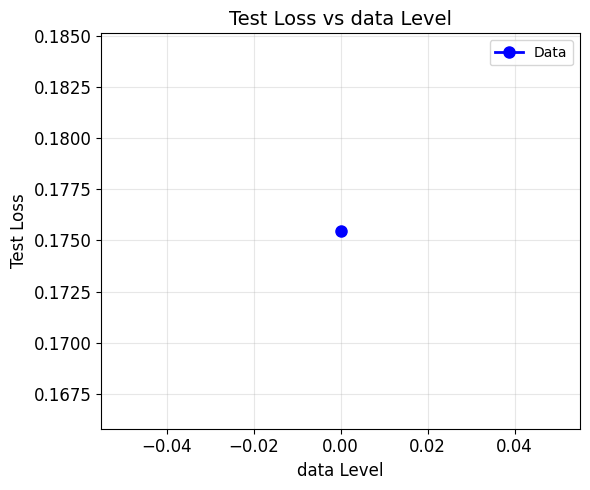

Plot saved to: data_0/loss_0.05/other_plots/avg_radius.png


Plot saved to: data_0/loss_0.05/other_plots/radius_hist.png


Plot saved to: data_0/acc_0.85/avg_radius.png


Plot saved to: data_0/acc_0.85/radius_hist.png
Plot saved to: data_0/acc_0.85/log_volume.png


Plot saved to: data_0/acc_0.85/gen_log_volume.png
Ranks for quick verification:
data_level ranks: [1]
test_loss ranks: [1]
log_exp_r_n ranks: [1]
log_exp_r_n_acc ranks: [1]

Loss:
Does it predict the minimas which are actually trained?  True
How many violations does it have, when ordering the log volumes?  0

Accuracy:
Does it predict the minimas which are actually trained?  True
How many violations does it have, when ordering the log volumes?  0
Results saved to data_0/loss_0.05/results.json
Successfully analyzed data_0 with loss=0.05, acc=0.85

Analysis complete for all directories!


In [2]:
# Define thresholds as pairs
loss_thresholds = [0.1, 0.2, .05]
accuracy_thresholds = [0.95, 0.9, 0.85]

if len(loss_thresholds) != len(accuracy_thresholds):
    raise ValueError("loss_thresholds and accuracy_thresholds must have the same length!")

display_options = {
    'loss_plots': False,
    'accuracy_plots': False
}

valid_starts = ['poison', 'noise', 'data']
directories_to_analyze = [d for d in os.listdir('.') 
                           if os.path.isdir(d) and any(d.startswith(prefix) for prefix in valid_starts)]

print("Directories to analyze:", directories_to_analyze)

# Loop through each directory
for directory in directories_to_analyze:
    print(f"\n{'='*50}")
    print(f"Analyzing directory: {directory}")
    print(f"{'='*50}")

    # Loop through each (loss, acc) pair
    for loss_threshold, accuracy_threshold in zip(loss_thresholds, accuracy_thresholds):
        print(f"\n--- Using thresholds: loss={loss_threshold}, acc={accuracy_threshold} ---")

        save_paths_dict = {
            "log_volume": f"{directory}/loss_{loss_threshold}/log_volume.png",
            "log_volume_generalization": f"{directory}/loss_{loss_threshold}/gen_log_volume.png",
            "model_modification_vs_test_loss": f"{directory}/loss_{loss_threshold}/test_vs_data.png",
            "average_radius_loss": f"{directory}/loss_{loss_threshold}/other_plots/avg_radius.png",
            "radius_histogram_loss": f"{directory}/loss_{loss_threshold}/other_plots/radius_hist.png",
            "average_radius_acc": f"{directory}/acc_{accuracy_threshold}/avg_radius.png",
            "radius_histogram_acc": f"{directory}/acc_{accuracy_threshold}/radius_hist.png",
            "log_volume_acc": f"{directory}/acc_{accuracy_threshold}/log_volume.png",
            "log_volume_generalization_acc": f"{directory}/acc_{accuracy_threshold}/gen_log_volume.png",
            "results.json": f"{directory}/loss_{loss_threshold}"
        }

        try:
            results = analyze_and_plot_model_landscape(
                directory=directory, 
                loss_threshold=loss_threshold, 
                acc_threshold=accuracy_threshold, 
                verbose=True,
                display_options=display_options,
                save_paths_dict=save_paths_dict,
            )
            print(f"Successfully analyzed {directory} with loss={loss_threshold}, acc={accuracy_threshold}")
        
        except Exception as e:
            print(f"Error analyzing {directory} with loss={loss_threshold}, acc={accuracy_threshold}: {e}")
            continue

print("\nAnalysis complete for all directories!")
